#### About

> Clustering 

Clustering is a common technique in unsupervised learning that involves grouping similar data points together based on their similarity or proximity in a given feature space. Let's dive into the math and code behind one of the most widely used clustering algorithms, k-means clustering. 

> Mathematics for K-means clustering:

The goal of K-means clustering is to partition the data set into “k” separated clusters, where each data point belongs to the cluster with the closest centroid. The algorithm minimizes the sum of squares of the distances between data points and their respective centroids, also known as cluster sum of squares (WCSS). The objective function for K-means clustering can be expressed mathematically as:

Objective function: J = ∑_{i=1}^{k} ∑_{x∈C_i} ||x - μ_i||^2

Where:

k: number of clusters
x: data point
μ_i: centroid of the ith cluster
C_i: set of data points belonging to the ith cluster
The goal is to find a center that minimizes this objective function.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [7]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.7)


In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


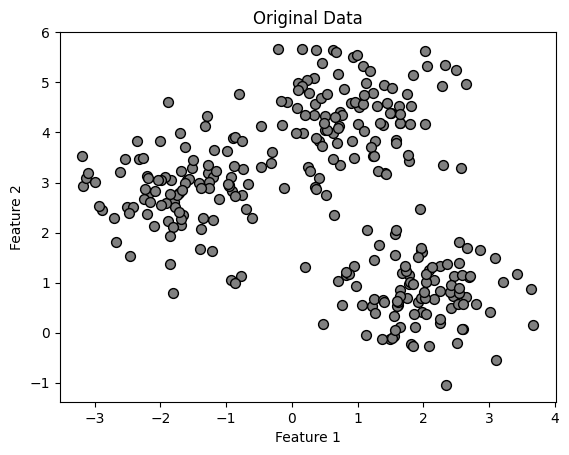

In [9]:
# Visualize the original data
plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolors='black', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# Instantiate KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)


In [11]:
# Fit the KMeans model to the dataset
kmeans.fit(X)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
# Obtain the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [13]:
# Perform k-means clustering with hyperparameter tuning
param_grid = {'n_clusters': range(2, 6),
              'init': ['k-means++', 'random']}
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_scaled)
best_kmeans = grid_search.best_estimator_
best_labels = best_kmeans.labels_
best_centroids = best_kmeans.cluster_centers_
best_wcss = best_kmeans.inertia_
best_silhouette_score = silhouette_score(X_scaled, best_labels)


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

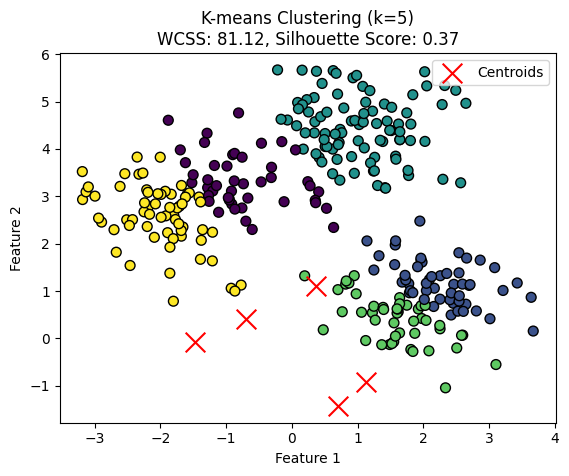

In [14]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='o', edgecolors='black', s=50)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering (k={})\nWCSS: {:.2f}, Silhouette Score: {:.2f}'.format(best_kmeans.n_clusters, best_wcss, best_silhouette_score))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

K-means clustering is an iterative algorithm that can converge to different solutions depending on the initial location of the centroids. To improve the reliability of the results, it is common to run the algorithm several times with different initializations and choose the solution with the lowest WCSS. It is also important to pre-process the data and choose an appropriate value of 'k' to ensure meaningful results.

> More types of clustering

Hierarchical Clustering: Hierarchical clustering is a clustering algorithm that creates a hierarchy of clusters by recursively splitting or merging clusters. There are two main types of hierarchical clustering: agglomerative and distributive. Agglomerative clustering starts with each data point as a single cluster and then recursively joins them together based on a measure of similarity or distance, while divisive clustering starts with all data points in one cluster and then recursively splits the set into several small clusters. Hierarchical clustering produces a tree-like structure called a dendrogram that can be used to visualize cluster hierarchies. 

DBSCAN (Density-Based Spatial Clustering for Noise Applied): DBSCAN is a density-based clustering algorithm that groups data points according to their density. It defines clusters as regions of dense points separated by regions of lower density of points and can identify noisy points that do not belong to any cluster. DBSCAN uses two main hyperparameters: epsilon (ε), which defines the radius around data points to form dense regions, and min_samples, which specifies the minimum number of points required to form dense regions.

Gaussian mixture model (GMM): GMM is a probabilistic model that models data points as a mixture of Gaussian distributions. It assumes that the data points are generated from a mixture of several Gaussian distributions, and the parameters of these distributions are estimated to determine the cluster structure. Compared to k-means clustering, GMM allows for more flexible cluster shapes because it models clusters as ellipsoidal shapes with different orientations and sizes. GMMs can also estimate the covariance between traits, making them suitable for capturing correlations among data variables.

Spectral Clustering: Spectral clustering is a graph-based clustering algorithm that uses eigenvalues ​​and eigenvectors of a similarity matrix to perform clustering. It treats data points as nodes in a graph, and edges between nodes represent the similarity or distance between data points. Spectral clustering first creates a similarity matrix and then uses spectral methods to obtain low-dimensional representations of the data, which are then clustered using traditional clustering algorithms such as k-means. 

Fuzzy clustering: Fuzzy clustering is a clustering algorithm that assigns data points to multiple clusters with different degrees of membership, instead of assigning each data point to a single cluster, as in traditional clustering algorithms. Fuzzy clustering uses fuzzy logic to assign data points to clusters based on their similarity to multiple cluster centroids. This provides a more flexible allocation, suitable for cases where data points may belong to multiple clusters at the same time.